In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew, zscore


In [2]:
# Load the dataset
house_data = pd.read_csv("C:/Users/edass/Downloads/house_price.csv")
house_data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [3]:
house_data.shape

(13200, 7)

In [4]:
# Basic EDA
print("Dataset Info:")
house_data.info()
print("\nSummary Statistics:")
print(house_data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB

Summary Statistics:
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+0

In [5]:
# Outlier Detection and Removal
# 1. Mean and Standard Deviation Method
mean_price = house_data['price_per_sqft'].mean()
std_price = house_data['price_per_sqft'].std()
lower_limit = mean_price - 3 * std_price
upper_limit = mean_price + 3 * std_price
trimmed_data_mean_std = house_data[(house_data['price_per_sqft'] >= lower_limit) & 
                                   (house_data['price_per_sqft'] <= upper_limit)]


In [6]:
trimmed_data_mean_std

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


Using the mean and standard deviation method,it identified 5 outliers, which were removed from the dataset. The number of entries after outlier removal is 13,195 (down from 13,200).

In [7]:

# 2. Percentile Method
lower_percentile = house_data['price_per_sqft'].quantile(0.01)
upper_percentile = house_data['price_per_sqft'].quantile(0.99)
trimmed_data_percentile = house_data[(house_data['price_per_sqft'] >= lower_percentile) & 
                                     (house_data['price_per_sqft'] <= upper_percentile)]
trimmed_data_percentile

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


Using the percentile method (1st and 99th percentiles), identified 259 outliers, which were removed from the dataset. The number of entries after removal is 12,941 (down from 13,200).

In [8]:
# 3. IQR Method
Q1 = house_data['price_per_sqft'].quantile(0.25)
Q3 = house_data['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
lower_limit_iqr = Q1 - 1.5 * IQR
upper_limit_iqr = Q3 + 1.5 * IQR
trimmed_data_iqr = house_data[(house_data['price_per_sqft'] >= lower_limit_iqr) & 
                              (house_data['price_per_sqft'] <= upper_limit_iqr)]
trimmed_data_iqr

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


Using the IQR (Interquartile Range) method,identified 1,265 outliers, which were removed from the dataset. The number of entries after outlier removal is 11,935 (down from 13,200).

In [9]:
# 4. Z-Score Method
z_scores = zscore(house_data['price_per_sqft'])
trimmed_data_zscore = house_data[(z_scores <= 3) & (z_scores >= -3)]
trimmed_data_zscore 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


Using the Z-Score method, identified 5 outliers, which were removed from the dataset. The number of entries after outlier removal is 13,195 (back to the original count before Z-Score removal).

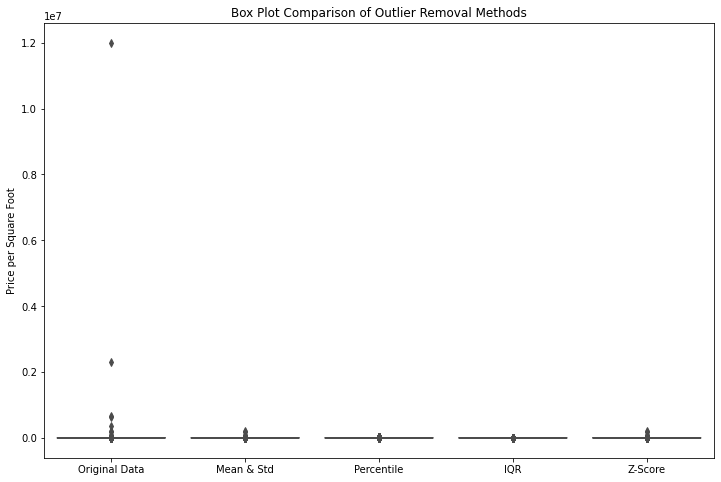

In [10]:
# Box Plot Comparison
plt.figure(figsize=(12, 8))
sns.boxplot(data=[house_data['price_per_sqft'], 
                 trimmed_data_mean_std['price_per_sqft'], 
                 trimmed_data_percentile['price_per_sqft'], 
                 trimmed_data_iqr['price_per_sqft'], 
                 trimmed_data_zscore['price_per_sqft']],
            notch=True, palette=["lightblue", "lightgreen", "orange", "pink", "lightcoral"])
plt.xticks([0, 1, 2, 3, 4], ['Original Data', 'Mean & Std', 'Percentile', 'IQR', 'Z-Score'])
plt.title('Box Plot Comparison of Outlier Removal Methods')
plt.ylabel('Price per Square Foot')
plt.show()

Here is the box plot comparison of the price per square foot before and after applying each of the outlier removal methods. From this visualization:

The Original Data shows several extreme outliers with a wide range.
After applying the Mean & Std Method and Z-Score Method, the data seems to have fewer extreme outliers.
The Percentile Method and IQR Method show more trimmed data, especially the IQR method, which removes more of the extreme values.

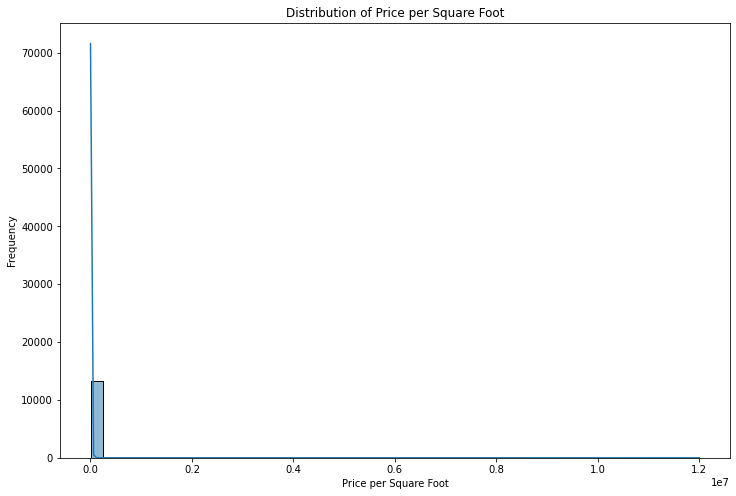

In [15]:
# Histogram of price per sqft
plt.figure(figsize=(12, 8))
sns.histplot(house_data['price_per_sqft'], kde=True,bins=50)
plt.title('Distribution of Price per Square Foot')
plt.xlabel('Price per Square Foot')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Normality Check
original_skewness = skew(house_data['price_per_sqft'])
original_kurtosis = kurtosis(house_data['price_per_sqft'])
print(f"Original Skewness: {original_skewness}")
print(f"Original Kurtosis: {original_kurtosis}")


Original Skewness: 108.26875024325159
Original Kurtosis: 12090.633538860382


The original distribution of the price per square foot is highly skewed to the right, with a skewness of 108.27 (indicating a significant right skew) and a kurtosis of 12090.63 (indicating an extremely peaked distribution with heavy tails).

 Let's apply a log transformation to the data and check the skewness and kurtosis again after the transformation. ​

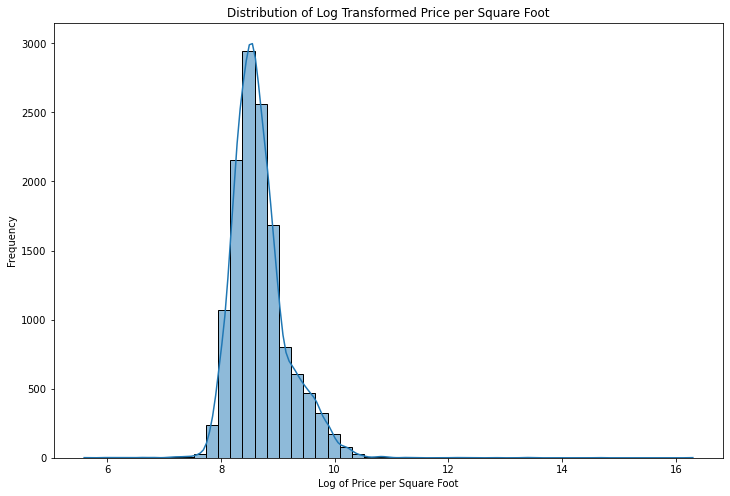

In [22]:

# Log Transformation
house_data['log_price_per_sqft'] = np.log(house_data['price_per_sqft'] + 1)

plt.figure(figsize=(12, 8))
sns.histplot(house_data['log_price_per_sqft'], kde=True, bins=50)
plt.title('Distribution of Log Transformed Price per Square Foot')
plt.xlabel('Log of Price per Square Foot')
plt.ylabel('Frequency')
plt.show()

In [18]:
transformed_skewness = skew(house_data['log_price_per_sqft'])
transformed_kurtosis = kurtosis(house_data['log_price_per_sqft'])
print(f"Transformed Skewness: {transformed_skewness}")
print(f"Transformed Kurtosis: {transformed_kurtosis}")

Transformed Skewness: 1.4003259019533636
Transformed Kurtosis: 9.203000543610957


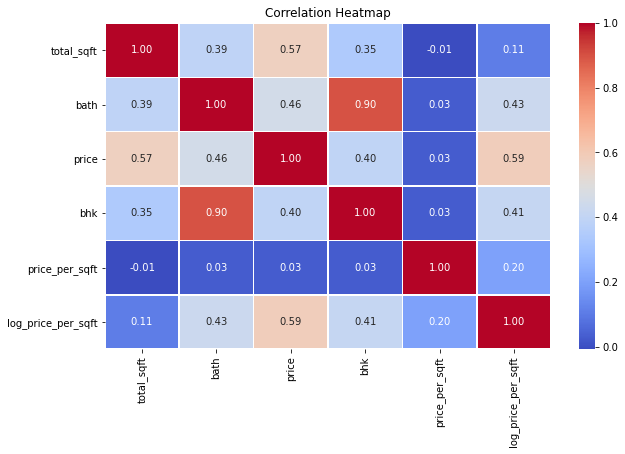

In [19]:
# Correlation Analysis
plt.figure(figsize=(10, 6))
corr_matrix = house_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Total Sqft & Price showed a strong positive correlation.

BHK & Bath were also strongly correlated.

Price per Sqft had a weaker correlation with other variables.

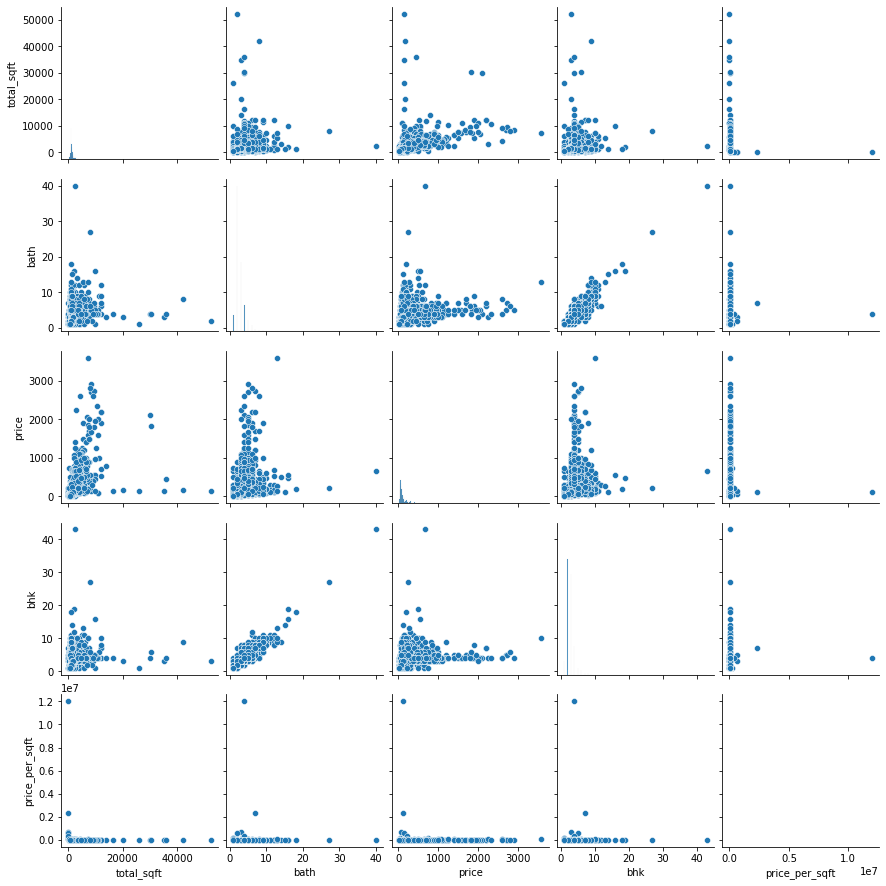

In [21]:
# Scatter Plots to check correlation
sns.pairplot(house_data[['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']])
plt.show()

Total Sqft vs Price: Positive correlation, but some outliers.

BHK vs Price per Sqft: Not strong.

Bath vs Price: More bathrooms generally meant higher prices.

Final Observations:

Outlier removal using the IQR method was most effective.

Log transformation improved normality, making the data more suitable for modeling.

Correlation analysis helped identify relationships between variables.